# Prac 3

Preprocessing: Import libraries

In [38]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Q1  Make Scatterplots for each dataset. Import and plot

In [39]:
w3_classif = pd.read_csv('w3classif.csv', header=None)
w3_classif = w3_classif.rename(columns={0: "x1", 1: "x2", 2:'y'})

w3_regr = pd.read_csv('w3regr.csv', header=None)
w3_regr = w3_regr.rename(columns={0: "x1", 1: "y"})

print(w3_classif.head())


         x1        x2  y
0  0.475861  0.541139  0
1  1.412233 -1.540877  0
2  0.022608 -0.203143  0
3 -0.047869 -0.499965  0
4  1.701335  0.383024  0


Scatterplot for regression data

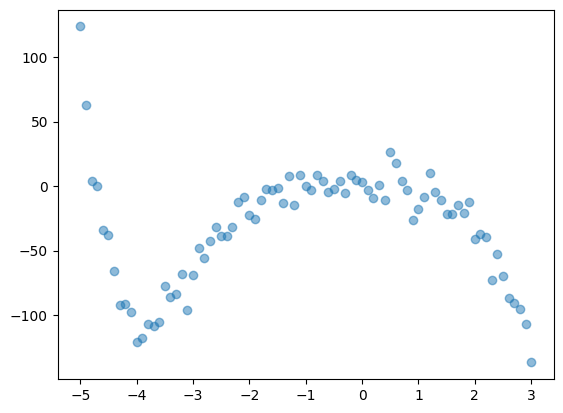

In [40]:
plt.scatter(w3_regr['x1'], w3_regr['y'], alpha=0.5)
plt.show()

Scatterplot for classification data

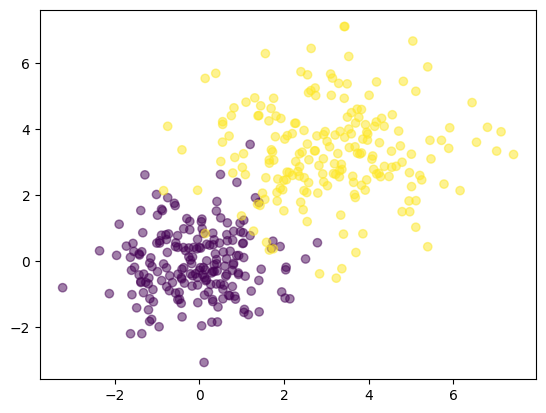

In [41]:
plt.scatter(w3_classif['x1'], w3_classif['x2'], c=w3_classif['y'], alpha=0.5)
plt.show()

#### Q2) Split test train data. import library from sklearn

In [42]:
from sklearn.model_selection import train_test_split

X = w3_classif[['x1', 'x2']]
y = w3_classif['y']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
print(X_train.head()) #test if this is working correctly


X2 = w3_regr['x1']
y2 = w3_regr['y']
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.30, random_state=42)



           x1        x2
157  0.886377  2.377412
109 -1.097868 -0.865815
17   0.213042 -0.938301
347  5.043473  6.654877
24  -1.314724 -0.398333


##### Q3) a Build a knn classifier
This method applies the DecisionBoundaryDisplay from sklearn. Observe the relative 'choppy' boundary

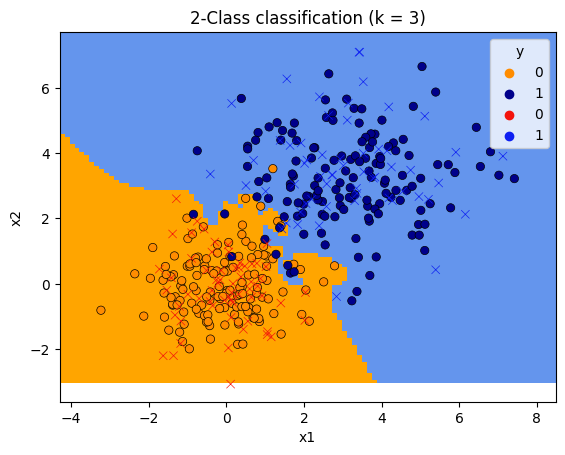

In [75]:
n_neighbors=3
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]
cmap_bold_2 = ["#f3130c", "#0d1ff2"]


# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel='x1',
    ylabel='x2',
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X_train['x1'],
    y=X_train['x2'],
    hue=y,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

# Plot also the test points
sns.scatterplot(
    x=X_test['x1'],
    y=X_test['x2'],
    hue=y,
    palette=cmap_bold_2,
    alpha=1.0,
    marker='x'
)

plt.title(
    "2-Class classification (k = %i)" % (n_neighbors)
    )

plt.show()

Alternatively, apply meshgrid. Observe the smoother defined boundaries

C:\Users\701da\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


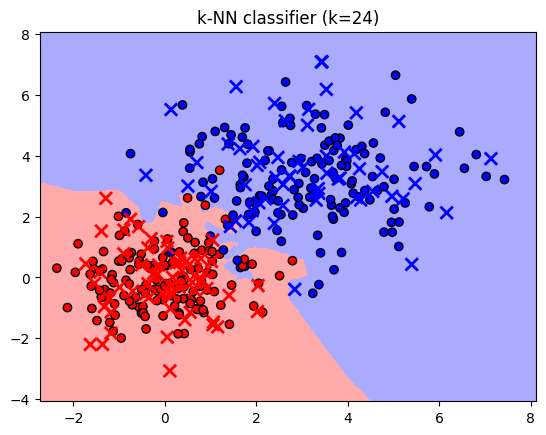

In [44]:
h = 0.02
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class of each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision regions
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points as dots with differentiating classification colour depending on y_value
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k')

# Plot the test points as 'x'
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cmap_bold, marker='x', s=80, linewidths=2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"k-NN classifier (k={k})")
plt.show()

Determine the missclassification rate:

In [88]:
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy

# Ratio of data points that have been removed from training set due to k value
print(f"\nTraining Loss: {1 - clf.score(X_train, y_train)}")



# Ratio of incorrect classifications of test data
print(f"Test Loss (Misclassification Rate): {misclassification_rate}")


Training Loss: 0.014285714285714235
Test Loss (Misclassification Rate): 0.0


#### c) observe different k values for the knn classification

   index  accuracy score
0      1        0.983333
1      2        0.975000
2      3        0.991667
3      4        0.975000
4      5        0.991667


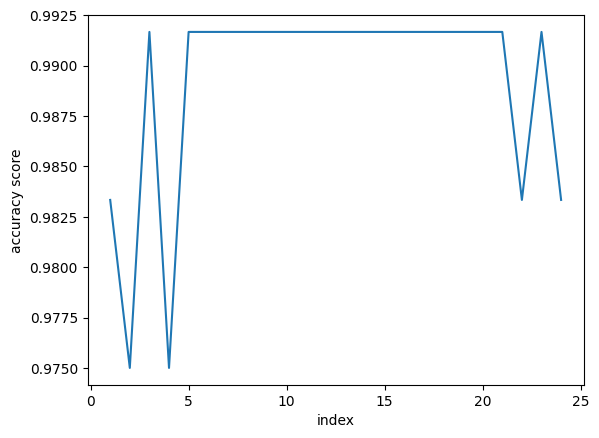

In [ ]:
classification_rates = []

for k in range(1,25):
    clf = KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    
    y_predict = clf.predict(X_test)
    classification_rates.append(accuracy_score(y_test, y_predict))

classification = pd.DataFrame(classification_rates, columns=['accuracy score'])
classification = classification.reset_index() #add index
classification['index'] = classification['index'] + 1

print(classification.head())
sns.lineplot(data=classification, x='index', y='accuracy score')
plt.show()


## Q4) 
A) Build a k-NN regression models with k=3 for dataset w3regr.csv and find the training and test loss

In [ ]:
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train2.to_numpy().reshape(-1,1), y_train2)

y_predict2 = clf.predict(X_test2.to_numpy().reshape(-1,1))

# Calculate the training and test loss using mean squared error
# Note Numpy is utilised for the summation function
train_loss = np.mean((clf.predict(X_train2.to_numpy().reshape(-1,1)) - y_train2) ** 2)
test_loss = np.mean((clf.predict(X_test2.to_numpy().reshape(-1,1)) - y_test2) ** 2)

print(mean_squared_error(y_test2, y_predict2))
print(f"Sum of squared error for training set: {round(train_loss, 3)}")
print(f"Sum of squared error for test set: {round(test_loss, 3)}")

552.831346754702
Sum of squared error for training set: 111.115
Sum of squared error for test set: 552.831


b) plot the training and/or test data together, with the predicted 'function' of the model

(25, 1)
(25, 1)


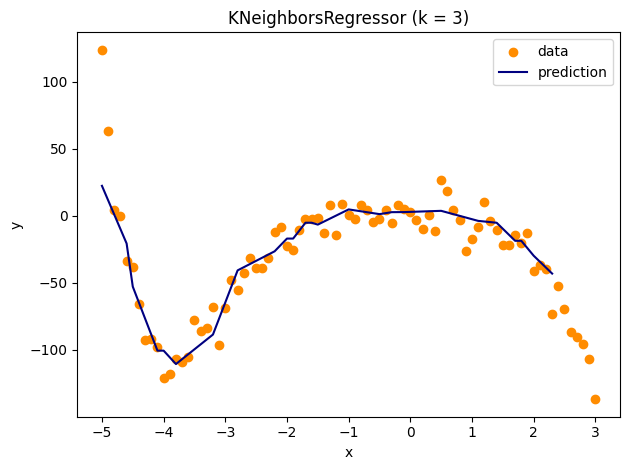

In [ ]:
# for x and y testing. Wee need to sort them first, if we want to plot them
#incrementally
test_sort = np.sort(X_test2.to_numpy())
y_predict = clf.predict(test_sort.reshape(-1,1))

# make sure these are the same size
print(X_test2.to_numpy().reshape(-1,1).shape)
print(y_predict.reshape(-1,1).shape) 

#plot them
plt.subplot()
plt.scatter(X2.to_numpy().reshape(-1,1), y2.to_numpy().reshape(-1,1), color="darkorange", label="data")
plt.plot(test_sort.reshape(-1,1), y_predict.reshape(-1,1), color="navy", label="prediction")

plt.axis("tight")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("KNeighborsRegressor (k = %i)" % (n_neighbors))

plt.tight_layout()
plt.show()  

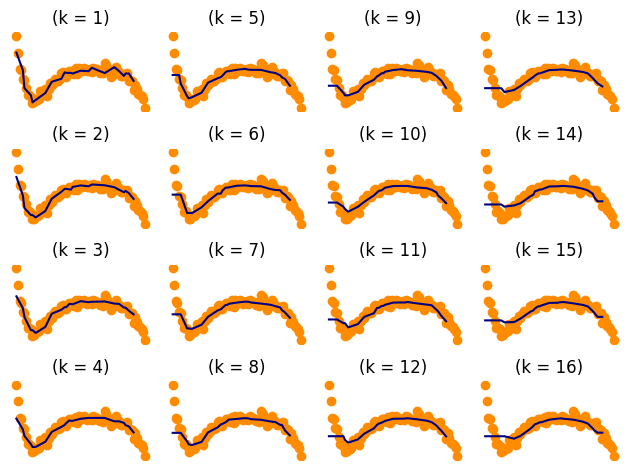

In [ ]:
#plot them
fig, axs = plt.subplots(4, 4)

for i in range(1, 17):

    #training
    clf = KNeighborsRegressor(n_neighbors=i)
    clf.fit(X_train2.to_numpy().reshape(-1,1), y_train2)

    # for x and y testing. Wee need to sort them first, if we want to plot them
    #incrementally
    test_sort = np.sort(X_test2.to_numpy())
    y_predict = clf.predict(test_sort.reshape(-1,1))

    axs[(i-1) % 4, (i-1) // 4].plot(test_sort.reshape(-1,1), y_predict.reshape(-1,1), color="navy", label="prediction")
    axs[(i-1) % 4, (i-1) // 4].scatter(X2.to_numpy().reshape(-1,1), y2.to_numpy().reshape(-1,1), color="darkorange", label="data")
    axs[(i-1) % 4, (i-1) // 4].set_title(f"(k = {i})")
    axs[(i-1) % 4, (i-1) // 4].axis('off') #remove axes because we have so many graphs

plt.tight_layout()

plt.show()  

## Q 5
a) Build a decision tree classifier for for dataset w3classif.csv and find training and test loss

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

missclassification = classification_report(y_test, y_predict)
print(missclassification)
print(f"Accuracy score: {accuracy_score(y_test, y_predict)}")

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.98      0.97      0.97        58

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

Accuracy score: 0.975


b) Plot the decision regions for your classifier together with the training/test points

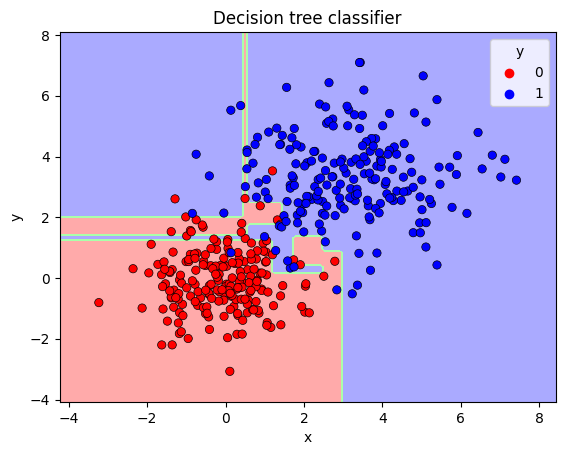

In [82]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_bold_list = ['#FF0000', '#0000FF']

clf = DecisionTreeClassifier().fit(X_train, y_train)

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    response_method="predict",
    xlabel='x',
    ylabel='y',
)

# Plot also the training points
sns.scatterplot(
    x=X['x1'],
    y=X['x2'],
    hue=y,
    palette=cmap_bold_list,
    alpha=1.0,
    edgecolor="black",
)

plt.title(
    'Decision tree classifier'
    )

plt.show()

c) Experiment with different depth values

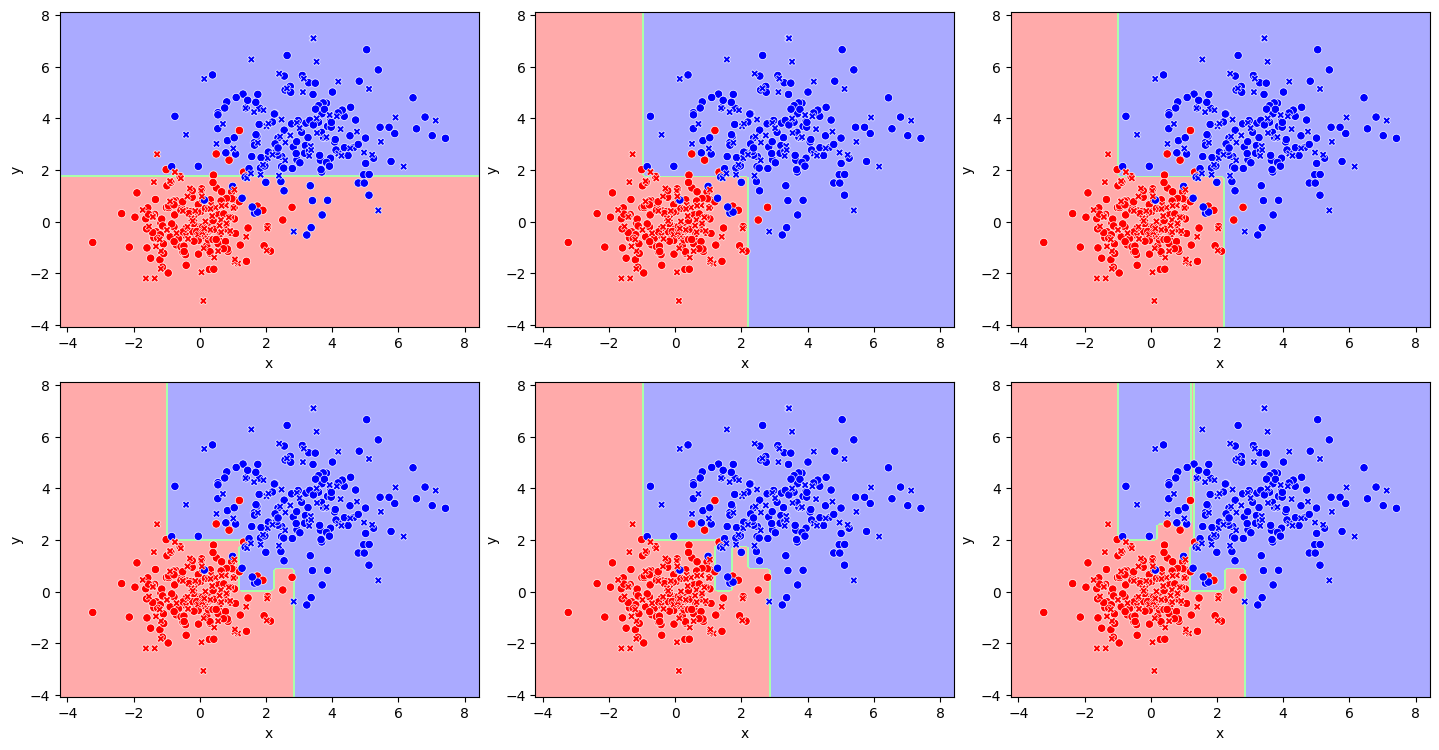

In [86]:
#plot them
plot_colors = "ryb"
plot_step = 0.02

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):

    # Train
    clf = DecisionTreeClassifier(max_depth=(pairidx + 1)).fit(X, y)
    
    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        ax=ax,
        cmap=cmap_light,
        xlabel='x',
        ylabel='y'
    )
    
    sns.scatterplot(x=X['x1'], y=X['x2'], hue=y_train, palette=cmap_bold_list, alpha=1)
    sns.scatterplot(x=X_test['x1'], y=X_test['x2'], hue=y_test, palette=cmap_bold_list, s=30, marker='X', linewidths=2)
    
    ax.get_legend().remove()
    
_ = plt.axis("tight")
plt.show()

## Q 6
a) Build a decision tree regressor for for dataset w3regr.csv and find SSE

In [90]:
clf = DecisionTreeRegressor()
clf.fit(X_train2.to_numpy().reshape(-1,1), y_train2)
y_predict2 = clf.predict(X_test2.to_numpy().reshape(-1,1))

# Calculate the training and test loss using mean squared error
# Note Numpy is utilised for the summation function
train_loss = np.mean((clf.predict(X_train2.to_numpy().reshape(-1,1)) - y_train2) ** 2)
test_loss = np.mean((clf.predict(X_test2.to_numpy().reshape(-1,1)) - y_test2) ** 2)

print(f"MSE: {round(mean_squared_error(y_test2, y_predict2), 3)}")
print(f"Sum of squared error for training set: {round(train_loss, 3)}")
print(f"Sum of squared error for test set: {round(test_loss, 3)}")

MSE: 403.207
Sum of squared error for training set: 0.0
Sum of squared error for test set: 403.207


b) Plot the decision tree regression for your classifier together with the training/test points

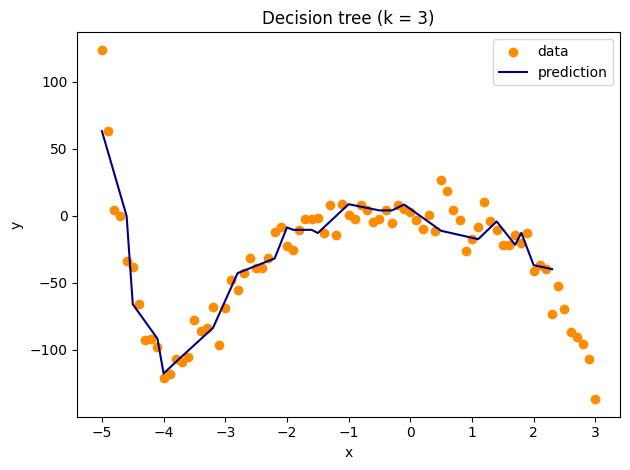

In [91]:
# Train
clf = DecisionTreeRegressor()
clf.fit(X_train2.to_numpy().reshape(-1,1), y_train2)

# for x and y testing. Wee need to sort them first, if we want to plot them
#incrementally
test_sort = np.sort(X_test2.to_numpy())
y_predict = clf.predict(test_sort.reshape(-1,1))

plt.subplot()
plt.scatter(X2.to_numpy().reshape(-1,1), y2.to_numpy().reshape(-1,1), color="darkorange", label="data")
plt.plot(test_sort.reshape(-1,1), y_predict.reshape(-1,1), color="navy", label="prediction")
plt.axis("tight")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Decision tree (k = %i)" % (n_neighbors))

plt.tight_layout()
plt.show()  

